In [0]:
##Group Project - Big Data

## Carlos Cardoso|20211220   Carlota Reis|20211208   Guilherme Miranda|20210420    Mariana Garcia|20210838 

In [0]:
#Importing packages/libraries

from pyspark.sql.functions import *
import os
import string
import time
import csv
import itertools
import requests
import sys
import gzip
import pyspark
import os
import pandas as pd
import numpy as np
from pyspark.sql.types import *
from pyspark.sql import functions as f
from pyspark.sql import Row
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

/databricks/spark/python/pyspark/sql/context.py:82: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [0]:
# File location and type
file_location = "/FileStore/tables/loan.csv"

file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
loan_df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)



In [0]:
# Create a view or table. 
temp_table_name = "loan_csv"
loan_df.createOrReplaceTempView(temp_table_name)

In [0]:
loan_df.write.parquet('AA_DFW_ALL.parquet', mode='overwrite')

In [0]:
print((loan_df.count(), len(loan_df.columns)))

(635611, 74)


In [0]:
#Display Loan

display(loan_df)

id member_id loan_amnt funded_amnt funded_amnt_inv term int_rate installment grade sub_grade emp_title emp_length home_ownership annual_inc verification_status issue_d loan_status pymnt_plan url desc purpose title zip_code addr_state dti delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_il_6m open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m 1077501 1296599 5000 5000 4975 36 months 10.65 162.87 B B2 null 10+ years RENT 24000 Verified Dec-11 Fully Paid n https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501 Borrower added on 12/22/11 > I need to upgrade my business technologies. credit_card Computer 860xx AZ 27.65 0 Jan-85 1 null null 3 0 13648 83.7 9 f 0 0 5861.071414 5831.78 5000 861.07 0 0 0 Jan-15 171.62 null Jan-16 0 null 1 INDIVIDUAL null null null 0 null null null null null null null null null null null null null null null null null 1077430 1314167 2500 2500 2500 60 months 15.27 59.83 C C4 Ryder < 1 year RENT 30000 Source Verified Dec-11 Charged Off n https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430 Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up. Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces car bike 309xx GA 1 0 Apr-99 5 null null 3 0 1687 9.4 4 f 0 0 1008.71 1008.71 456.46 435.17 0 117.08 1.11 Apr-13 119.66 null Sep-13 0 null 1 INDIVIDUAL null null null 0 null null null null null null null null null null null null null null null null null 1077175 1313524 2400 2400 2400 36 months 15.96 84.33 C C5 null 10+ years RENT 12252 Not Verified Dec-11 Fully Paid n https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175 null small_business real estate business 606xx IL 8.72 0 Nov-01 2 null null 2 0 2956 98.5 10 f 0 0 3003.653644 3003.65 2400 603.65 0 0 0 Jun-14 649.91 null Jan-16 0 null 1 INDIVIDUAL null null null 0 null null null null null null null null null null null null null null null null null 1076863 1277178 10000 10000 10000 36 months 13.49 339.31 C C1 AIR RESOURCES BOARD 10+ years RENT 49200 Source Verified Dec-11 Fully Paid n https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863 Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time. other personel 917xx CA 20 0 Feb-96 1 35 null 10 0 5598 21 37 f 0 0 12226.30221 12226.3 10000 2209.33 16.97 0 0 Jan-15 357.48 null Jan-15 0 null 1 INDIVIDUAL null null null 0 null null null null null null null null null null null null null null null null null 1075358 1311748 3000 3000 3000 60 months 12.69 67.79 B B5 University Medical Group 1 year RENT 80000 Source Verified Dec-11 Current n https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358 Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills. I've always been a good payor but have fou

In [0]:
loan_df2 = loan_df
loan_df2 = loan_df2.withColumn("loan_amnt", loan_df.loan_amnt.cast("integer"))\
                 .withColumn("funded_amnt", loan_df.funded_amnt.cast("integer"))\
                 .withColumn("funded_amnt_inv", loan_df.funded_amnt_inv.cast("integer"))\
                 .withColumn("int_rate", regexp_replace("int_rate", "%", "").cast("float"))\
                 .withColumn("installment", loan_df.installment.cast("integer"))\
                 .withColumn("annual_inc", loan_df.annual_inc.cast("integer"))\
                 .withColumn("dti", loan_df.dti.cast("integer"))\
                 .withColumn("delinq_2yrs", loan_df.delinq_2yrs.cast("integer"))\
                 .withColumn("inq_last_6mths", loan_df.inq_last_6mths.cast("integer"))\
                 .withColumn("open_acc", loan_df.open_acc.cast("integer"))\
                 .withColumn("pub_rec", loan_df.pub_rec.cast("integer"))\
                 .withColumn("revol_bal", loan_df.revol_bal.cast("integer"))\
                 .withColumn("revol_util", regexp_replace("revol_util", "%", "").cast("float"))\
                 .withColumn("total_acc", loan_df.total_acc.cast("integer"))\
                 .withColumn("out_prncp", loan_df.out_prncp.cast("integer"))\
                 .withColumn("issue_year", substring(loan_df.issue_d, 5, 4).cast("double"))\
                 .withColumn("earliest_year", substring(loan_df.earliest_cr_line, 5, 4).cast("double"))\
                 .withColumn("mths_since_last_delinq", loan_df.mths_since_last_delinq.cast("integer"))\
                 .withColumn("mths_since_last_record", loan_df.mths_since_last_record.cast("integer"))\
                 .withColumn("out_prncp_inv", loan_df.out_prncp_inv.cast("integer"))\
                 .withColumn("total_pymnt", loan_df.total_pymnt.cast("integer"))\
                 .withColumn("total_pymnt_inv", loan_df.total_pymnt_inv.cast("integer"))\
                 .withColumn("total_rec_prncp", loan_df.total_rec_prncp.cast("integer"))\
                 .withColumn("total_rec_int", loan_df.total_rec_int.cast("integer"))\
                 .withColumn("total_rec_late_fee", loan_df.total_rec_late_fee.cast("integer"))\
                 .withColumn("recoveries", loan_df.recoveries.cast("integer"))\
                 .withColumn("collection_recovery_fee", loan_df.collection_recovery_fee.cast("integer"))\
                 .withColumn("last_pymnt_d", substring(loan_df.last_pymnt_d, 5, 4).cast("double"))\
                 .withColumn("last_pymnt_amnt", loan_df.last_pymnt_amnt.cast("integer"))\
                 .withColumn("next_pymnt_d", substring(loan_df.next_pymnt_d, 5, 4).cast("double"))\
                 .withColumn("last_credit_pull_d", substring(loan_df.last_credit_pull_d, 5, 4).cast("double"))


In [0]:
# Now, we try to convert the emp_length column into numeric type

loan_df2 = loan_df2.withColumn("emp_length", trim(regexp_replace(loan_df2.emp_length, "([ ]*+[a-zA-Z].*)|(n/a)", "") ))
loan_df2 = loan_df2.withColumn("emp_length", trim(regexp_replace(loan_df2.emp_length, "< 1", "0") ))
loan_df2 = loan_df2.withColumn("emp_length", trim(regexp_replace(loan_df2.emp_length, "10\\+", "10") ).cast("float"))

# now, we map multiple levels if verification_status attribute into one factor level
loan_df2 = loan_df2.withColumn("verification_status", trim(regexp_replace(loan_df2.verification_status, "Source Verified", "Verified")))

# Create default_loan with only two values for default and not default!
loan_df2 = loan_df2.filter(loan_df2.loan_status.isin(["Default", "Charged Off", "Late (31-120 days)", "Late (16-30 days)", "Fully Paid"])).withColumn("default_loan", (~(loan_df2.loan_status == "Fully Paid")).cast("string"))

In [0]:
# creating new measures:

# 1- for length of credit in years
loan_df2 = loan_df2.withColumn("credit_length_in_years", (loan_df2.issue_year - loan_df2.earliest_year))

# 2- for total amount of money earned or lost per loan with a new column to show how much of the total amount of the loan should be repaid to the bank by each person
loan_df2 = loan_df2.withColumn("remain", round( loan_df2.loan_amnt - loan_df2.total_pymnt, 2))

In [0]:
#check the changes in type of attributes in loan_df2
loan_df2.printSchema()


root
 |-- id: string (nullable = true)
 |-- member_id: string (nullable = true)
 |-- loan_amnt: integer (nullable = true)
 |-- funded_amnt: integer (nullable = true)
 |-- funded_amnt_inv: integer (nullable = true)
 |-- term: string (nullable = true)
 |-- int_rate: float (nullable = true)
 |-- installment: integer (nullable = true)
 |-- grade: string (nullable = true)
 |-- sub_grade: string (nullable = true)
 |-- emp_title: string (nullable = true)
 |-- emp_length: float (nullable = true)
 |-- home_ownership: string (nullable = true)
 |-- annual_inc: integer (nullable = true)
 |-- verification_status: string (nullable = true)
 |-- issue_d: string (nullable = true)
 |-- loan_status: string (nullable = true)
 |-- pymnt_plan: string (nullable = true)
 |-- url: string (nullable = true)
 |-- desc: string (nullable = true)
 |-- purpose: string (nullable = true)
 |-- title: string (nullable = true)
 |-- zip_code: string (nullable = true)
 |-- addr_state: string (nullable = true)
 |-- dti: inte

In [0]:
# Exploring variables and relation between variables


In [0]:
%sql
/*Frequency of different kinds of ownership*/
select home_ownership, count(*) as Total from loan_csv group by home_ownership

home_ownership Total null 625612 OWN 748 RENT 4639 MORTGAGE 4612

In [0]:
%sql
/*Frequency of different kinds of ownership*/
SELECT purpose, SUM(loan_amnt) AS Total_AMOUNT from loan_csv GROUP BY purpose ORDER BY SUM(loan_amnt) DESC

purpose Total_AMOUNT debt_consolidation 7.3694075E7 credit_card 1.9218975E7 home_improvement 8355675.0 other 7814400.0 small_business 6773050.0 major_purchase 3353700.0 wedding 2285800.0 car 2121725.0 house 1919325.0 medical 1565975.0 moving 824225.0 vacation 532400.0 renewable_energy 123975.0 never had any trouble with debts.""""I bought a duplex in june. The only thing left to renovate is the roof and redo the sidewalk and drive way. I am secure in my job 10000.0 hopefully in time for the holidays. I want to thank 8400.0 null null

In [0]:
display(loan_df2.groupBy("default_loan", "grade").agg((sum(col("remain"))).alias("sum_net")).sort(asc("grade")))

default_loan grade sum_net true A 819292 false A -2530843 true B 2039904 false B -4451346 true C 1826383 false C -3172962 false D -2480273 true D 1605653 true E 1603975 false E -2163170 false F -874535 true F 892608 true G 283268 false G -212062

In [0]:
display(loan_df2.select("loan_amnt", "int_rate", "annual_inc"))

loan_amnt int_rate annual_inc 5000 10.65 24000 2500 15.27 30000 2400 15.96 12252 10000 13.49 49200 5000 7.9 36000 3000 18.64 48000 5600 21.28 40000 5375 12.69 15000 6500 14.65 72000 12000 12.69 75000 9000 13.49 30000 3000 9.91 15000 10000 10.65 100000 1000 16.29 28000 10000 15.27 42000 3600 6.03 110000 6000 11.71 84000 9200 6.03 77385 20250 15.27 43370 21000 12.42 105000 10000 11.71 50000 10000 11.71 50000 6000 11.71 76000 15000 9.91 92000 15000 14.27 60000 5000 16.77 50004 4000 11.71 106000 8500 11.71 25000 4375 7.51 17108 31825 7.9 75000 5000 8.9 24044 7000 15.96 34000 12400 10.65 41000 10800 9.91 55596 15000 7.9 45000 6000 12.42 36852 9600 7.51 68004 12000 7.9 62300 3000 18.25 65000 4400 16.77 55000 6000 6.03 45600 14000 9.91 80000 5000 8.9 100000 10000 10.65 27000 10000 6.03 60000 11000 6.62 70000 15000 9.91 80000 25600 9.91 110000 7000 10.65 40000 12000 15.96 50000 12000 9.91 46000 21000 19.91 50000 16000 19.91 81000 10000 12.42 39000 10000 10.65 51400 7100 16.77 33000 13000 12.69 30000 17675 14.65 50000 8000 16.77 62000 10000 10.65 45996 3500 10.65 55000 12500 17.27 30000 16425 14.27 44544 8200 21.28 75000 15000 14.65 61000 20975 17.58 44000 6400 16.77 75000 3000 13.49 33600 12000 16.77 50000 14400 8.9 150000 12000 14.65 90000 11000 13.49 48000 7250 21.67 75000 15000 7.9 52000 18000 19.91 65000 35000 17.27 150000 10000 14.27 68000 11800 12.69 42000 4500 6.03 53000 7000 12.69 35000 9200 12.42 60000 4500 10.65 42000 12000 16.29 88365 12000 13.49 72000 12000 10.65 62000 7000 10.65 43680 8200 19.42 120000 10500 12.69 66000 7000 11.71 39120 20000 11.71 47800 17500 17.27 45000 3500 6.03 83000 6200 9.91 25000 6000 8.9 28800 7200 9.91 135000 9500 8.9 50000 18825 16.77 38000 24000 10.65 45000 6000 13.49 80000 6000 13.49 50000 2100 12.42 30000 5500 6.62 110000 11000 6.62 45608 26800 20.89 120000 8000 12.69 35000 10000 18.25 75000 8000 11.71 35000 10000 8.9 24000 12000 11.71 126000 10000 7.9 43000 12000 9.91 50000 25000 13.49 67000 19750 10.65 45000 10000 9.91 31200 13650 12.42 66000 28000 19.91 52000 18000 7.9 56964 2500 14.27 49500 21000 20.3 70000 35000 8.9 125000 10000 7.51 33000 7000 12.69 30000 24000 15.96 90000 10625 7.51 23000 5000 14.65 24000 8850 6.62 62000 6375 7.51 44000 6000 11.71 90000 11100 6.62 41000 10000 12.69 56000 6200 6.03 26500 15000 18.64 54000 4200 11.71 53000 14000 14.27 52800 8875 7.51 38000 13500 9.91 38000 12000 9.91 42000 16000 19.91 55000 21600 19.42 60000 6000 10.65 87000 8450 16.77 25000 20000 13.49 82000 10000 11.71 60000 12000 16.29 80000 13475 13.49 25000 7200 12.42 48000 5600 14.65 85000 12000 14.27 57000 8500 6.03 25000 8000 9.91 34000 8000 12.42 40000 16000 15.27 42656 15000 17.27 44400 10000 9.91 30000 10000 6.62 70000 8000 14.65 28000 22000 9.91 50000 6000 14.27 94800 2500 7.51 12000 13500 9.91 36000 25000 12.42 225000 10000 13.49 45900 2500 13.49 27200 7325 12.69 42000 4000 12.42 135000 10000 13.49 65000 7750 17.27 24000 20000 20.89 70000 9600 12.42 65000 21000 11.71 60000 14000 10.65 30000 13350 12.42 43000 15000 16.77 42000 15000 17.27 75000 35000 10.65 168000 9000 10.65 74000 16000 12.69 58500 13500 12.69 71000 24000 12.69 75000 12000 10.65 60000 28000 17.58 140000 14000 6.62 66000 12000 14.27 70000 25000 11.71 100000 9000 12.69 50000 13250 10.65 35000 20000 13.49 75000 3000 14.65 71000 7350 10.65 48000 11500 15.27 36000 13650 12.42 86000 10500 16.29 30000 12000 9.91 60000 6000 8.9 34000 11500 15.27 44200 7000 12.42 82000 29500 20.3 83000 2000 15.27 41000 11625 13.49 36000 15075 14.27 35000 5300 15.27 30000 8200 6.62 40000 12000 12.42 105000 8650 14.27 45000 12000 12.42 83000 9500 12.69 52500 7400 13.49 25000 14400 13.49 60000 24250 23.91 120000 7200 7.9 68000 26000 16.77 53000 7000 11.71 69600 4000 7.51 65000 1500 17.27 144000 19600 12.42 75000 2500 11.71 29000 10000 12.69 70000 10000 6.62 45000 4225 12.42 55200 3500 7.9 61440 12000 6.62 56000 16500 8.9 47000 22000 21.67 55000 12000 14.65 71000 10800 12.42 135000 14000 12.42 63000 6000 13.49 50000 12000 9.91 80000 10000 12.42 45000 8000 

In [0]:
display(loan_df.groupBy("addr_state").agg((count(col("annual_inc"))).alias("ratio")))

addr_state ratio AZ 231 SC 109 LA 104 MN 154 NJ 455 DC 48 OR 119 VA 316 null 0 RI 48 KY 88 WY 15 NH 41 MI 151 NV 131 WI 129 CA 1806 CT 203 MT 20 NC 291 VT 18 MD 241 DE 26 MO 188 IL 404 WA 230 MS 1 AL 110 OH 315 TN 1 NM 39 PA 344 SD 23 NY 942 TX 707 WV 37 this does not interfere with my primary source of income due to the second job only allowing me to schedule on days that I have off. My monthly expenses will be substantially lower due to my increase in pay. My monthly rent is extremely low.""" 1 GA 323 MA 259 KS 88 roof 1 FL 741 CO 184 AK 26 AR 74 OK 82 UT 75 HI 60

In [0]:
display(loan_df.groupBy("addr_state").agg((avg(col("annual_inc"))).alias("total_inc")))

addr_state total_inc AZ 70066.9374891775 SC 60633.99082568807 LA 64530.371538461535 MN 61850.70538961038 NJ 75922.7967032967 DC 74212.27083333333 OR 58872.8487394958 VA 75893.64655063293 null null RI 77730.44583333333 KY 63663.02647727273 WY 58151.6 NH 74247.21463414634 MI 64277.07284768212 NV 68652.05190839696 WI 63397.51937984496 CA 72307.15842746399 CT 81894.76216748767 MT 59046.8 NC 69550.68556701033 VT 49602.555555555555 MD 77754.9172614108 DE 75168.07692307692 MO 61668.47276595744 IL 69054.69613861387 WA 65668.46782608696 MS 106870.0 AL 68445.59836363637 OH 64445.18946031746 TN 120000.0 NM 59249.743589743586 PA 63426.24220930233 SD 57636.52173913043 NY 75620.87808917197 TX 74722.99591230552 WV 52185.02702702703 this does not interfere with my primary source of income due to the second job only allowing me to schedule on days that I have off. My monthly expenses will be substantially lower due to my increase in pay. My monthly rent is extremely low.""" 87996.0 GA 67445.65891640868 MA 79519.49405405404 KS 59585.01909090909 roof 120000.0 FL 65941.51585695006 CO 69012.48369565218 AK 62048.92461538462 AR 55701.9154054054 OK 65628.6331707317 UT 72601.02506666667 HI 68493.02666666667

In [0]:
display(loan_df.groupBy("addr_state").agg((avg(col("loan_amnt"))).alias("total_loan_amnt")))

addr_state total_loan_amnt AZ 13000.324675324675 SC 11219.954128440368 LA 12232.932692307691 MN 11421.42857142857 NJ 13464.78021978022 DC 14804.6875 OR 12476.470588235294 VA 13698.496835443038 null null RI 10120.3125 KY 13806.818181818182 WY 14445.0 NH 15811.585365853658 MI 12285.761589403974 NV 11941.984732824427 WI 14411.434108527132 CA 12706.201550387597 CT 14358.743842364533 MT 14063.75 NC 12101.202749140894 VT 10630.555555555555 MD 13222.19917012448 DE 11335.576923076924 MO 11743.617021276596 IL 12974.257425742575 WA 12517.608695652174 MS 6000.0 AL 14561.818181818182 OH 12436.746031746032 TN 28000.0 NM 9817.307692307691 PA 12232.122093023256 SD 11445.652173913044 NY 12402.016985138005 TX 13637.553041018387 WV 13834.45945945946 this does not interfere with my primary source of income due to the second job only allowing me to schedule on days that I have off. My monthly expenses will be substantially lower due to my increase in pay. My monthly rent is extremely low.""" 8400.0 GA 13182.120743034056 MA 14728.764478764479 KS 12682.954545454546 roof 10000.0 FL 12185.391363022942 CO 14031.929347826086 AK 16064.423076923076 AR 12009.45945945946 OK 12907.317073170732 UT 13726.333333333334 HI 12122.916666666666

In [0]:
# Exercise: Show the total number of default loans in each state?
#Create Pandas DataFrame
pandas_df = loan_df2.toPandas()

#Defaults per State (values)
tb1 = pd.crosstab(pandas_df.addr_state,pandas_df.default_loan).sort_values(by="true",ascending=False)

#Defaults per State (percentage terms)
tb2 = tb1
tb2["sum"]= tb2.sum(axis=1)
tb2["pct"] = tb2["true"]/tb1["sum"]*100
tb2 = tb2.sort_values(by="pct",ascending=False)

tb2

default_loan 
 false 
 true 
 sum 
 pct 
 
 
 addr_state 
 
 
 
 
 
 
 
 
 AK 
 16 
 8 
 24 
 33.333333 
 
 
 SD 
 15 
 6 
 21 
 28.571429 
 
 
 NV 
 82 
 32 
 114 
 28.070175 
 
 
 NM 
 27 
 9 
 36 
 25.000000 
 
 
 RI 
 34 
 11 
 45 
 24.444444 
 
 
 MD 
 168 
 48 
 216 
 22.222222 
 
 
 OR 
 82 
 23 
 105 
 21.904762 
 
 
 VA 
 226 
 58 
 284 
 20.422535 
 
 
 MI 
 111 
 28 
 139 
 20.143885 
 
 
 AZ 
 163 
 41 
 204 
 20.098039 
 
 
 AL 
 77 
 19 
 96 
 19.791667 
 
 
 OH 
 223 
 54 
 277 
 19.494585 
 
 
 WA 
 171 
 40 
 211 
 18.957346 
 
 
 FL 
 545 
 124 
 669 
 18.535127 
 
 
 CA 
 1365 
 302 
 1667 
 18.116377 
 
 
 IL 
 303 
 67 
 370 
 18.108108 
 
 
 KY 
 61 
 13 
 74 
 17.567568 
 
 
 WI 
 94 
 20 
 114 
 17.543860 
 
 
 GA 
 240 
 51 
 291 
 17.525773 
 
 
 NH 
 29 
 6 
 35 
 17.142857 
 
 
 HI 
 44 
 9 
 53 
 16.981132 
 
 
 NJ 
 342 
 69 
 411 
 16.788321 
 
 
 PA 
 254 
 49 
 303 
 16.171617 
 
 
 MN 
 121 
 23 
 144 
 15.972222 
 
 
 NY 
 718 
 135 
 853 
 15.826495 
 
 
 SC 
 87 
 16 
 103 
 15.533981 
 
 
 NC 
 218 
 40 
 258 
 15.503876 
 
 
 DE 
 22 
 4 
 26 
 15.384615 
 
 
 WY 
 11 
 2 
 13 
 15.384615 
 
 
 DC 
 40 
 7 
 47 
 14.893617 
 
 
 CT 
 150 
 25 
 175 
 14.285714 
 
 
 OK 
 64 
 10 
 74 
 13.513514 
 
 
 MA 
 189 
 29 
 218 
 13.302752 
 
 
 TX 
 563 
 86 
 649 
 13.251156 
 
 
 CO 
 142 
 21 
 163 
 12.883436 
 
 
 MO 
 150 
 22 
 172 
 12.790698 
 
 
 LA 
 86 
 12 
 98 
 12.244898 
 
 
 WV 
 29 
 4 
 33 
 12.121212 
 
 
 AR 
 59 
 8 
 67 
 11.940299 
 
 
 VT 
 15 
 2 
 17 
 11.764706 
 
 
 MT 
 16 
 2 
 18 
 11.111111 
 
 
 KS 
 68 
 7 
 75 
 9.333333 
 
 
 UT 
 64 
 6 
 70 
 8.571429 
 
 
 MS 
 1 
 0 
 1 
 0.000000 
 
 
 TN 
 1 
 0 
 1 
 0.000000 
 
 
 roof 
 1 
 0 
 1 
 0.000000

In [0]:
pd.crosstab(pandas_df.home_ownership, pandas_df.loan_status, values=pandas_df.funded_amnt, aggfunc="mean").round(2)

loan_status 
 Charged Off 
 Default 
 Fully Paid 
 Late (16-30 days) 
 Late (31-120 days) 
 
 
 home_ownership 
 
 
 
 
 
 
 
 
 
 MORTGAGE 
 15982.57 
 18000.0 
 13317.50 
 21800.0 
 19625.0 
 
 
 OWN 
 13216.29 
 NaN 
 11031.40 
 NaN 
 NaN 
 
 
 RENT 
 11953.11 
 21250.0 
 10519.23 
 14550.0 
 14000.0

In [0]:
pd.crosstab(pandas_df.verification_status, pandas_df.default_loan, values=pandas_df.funded_amnt, aggfunc="mean").round(2)

default_loan 
 false 
 true 
 
 
 verification_status 
 
 
 
 
 
 
 Not Verified 
 7855.72 
 8121.18 
 
 
 Verified 
 13807.00 
 15833.99

In [0]:
pd.crosstab(pandas_df.grade, pandas_df.loan_status, values=pandas_df.annual_inc, aggfunc="max").round(2)

loan_status 
 Charged Off 
 Default 
 Fully Paid 
 Late (16-30 days) 
 Late (31-120 days) 
 
 
 grade 
 
 
 
 
 
 
 
 
 
 A 
 187000.0 
 NaN 
 480000.0 
 36000.0 
 NaN 
 
 
 B 
 225000.0 
 NaN 
 900000.0 
 NaN 
 123000.0 
 
 
 C 
 200000.0 
 36000.0 
 1782000.0 
 39500.0 
 98000.0 
 
 
 D 
 250000.0 
 62000.0 
 480000.0 
 51000.0 
 185000.0 
 
 
 E 
 525000.0 
 NaN 
 543000.0 
 60000.0 
 127000.0 
 
 
 F 
 300000.0 
 NaN 
 350000.0 
 143000.0 
 NaN 
 
 
 G 
 400000.0 
 NaN 
 725000.0 
 NaN 
 NaN

In [0]:
pd.crosstab(pandas_df.grade, pandas_df.default_loan, values=pandas_df.annual_inc, aggfunc="min").round(2)

default_loan 
 false 
 true 
 
 
 grade 
 
 
 
 
 
 
 A 
 6000 
 12000 
 
 
 B 
 7200 
 10200 
 
 
 C 
 11340 
 12732 
 
 
 D 
 9600 
 14400 
 
 
 E 
 14400 
 17000 
 
 
 F 
 22000 
 18000 
 
 
 G 
 34000 
 37000

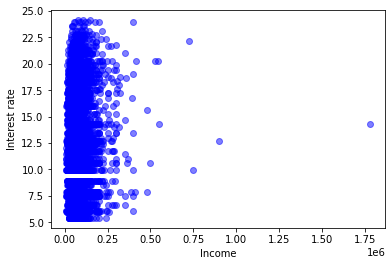

In [0]:
import matplotlib.pyplot as plt
plt.scatter(pandas_df.annual_inc, pandas_df.int_rate, c='blue', alpha=0.5)
plt.xlabel("Income")
plt.ylabel("Interest rate")
plt.show()

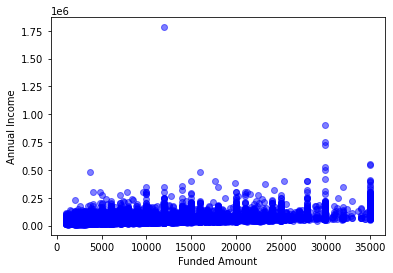

In [0]:
plt.scatter(pandas_df.funded_amnt, pandas_df.annual_inc, c='blue', alpha=0.5)
plt.xlabel("Funded Amount")
plt.ylabel("Annual Income")
plt.show()

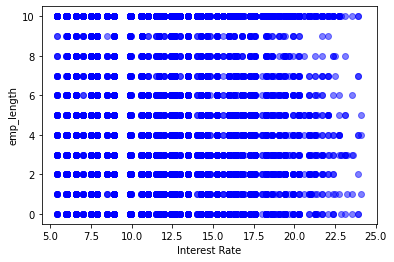

In [0]:
plt.scatter(pandas_df.int_rate, pandas_df.emp_length, c='blue', alpha=0.5)
plt.xlabel("Interest Rate")
plt.ylabel("emp_length")
plt.show()

In [0]:
# Exercise: Use a simple subsetting for idexing the rows with outliers and remove the outliers with index equal to TRUE such as 

#Removing Outlier annual income > 1,500,000

indices = pandas_df[pandas_df["annual_inc"] >= 1500000].index
pandas_df.drop(indices, inplace = True)

In [0]:
pandas_df.describe().T

count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 loan_amnt 
 9034.0 
 12311.340491 
 8290.571295 
 1000.00 
 6000.00 
 10000.000000 
 16000.00 
 35000.000000 
 
 
 funded_amnt 
 9034.0 
 12173.608036 
 8102.950862 
 1000.00 
 6000.00 
 10000.000000 
 16000.00 
 35000.000000 
 
 
 funded_amnt_inv 
 9034.0 
 12095.502325 
 8039.547754 
 750.00 
 6000.00 
 10000.000000 
 15975.00 
 35000.000000 
 
 
 int_rate 
 9034.0 
 12.142311 
 4.200052 
 5.42 
 8.49 
 11.710000 
 15.23 
 24.110001 
 
 
 installment 
 9034.0 
 357.284592 
 227.193284 
 30.00 
 187.00 
 313.000000 
 469.00 
 1288.000000 
 
 
 emp_length 
 8717.0 
 5.320179 
 3.527662 
 0.00 
 2.00 
 5.000000 
 10.00 
 10.000000 
 
 
 annual_inc 
 9034.0 
 69403.129621 
 45377.543621 
 6000.00 
 42000.00 
 60000.000000 
 83000.00 
 900000.000000 
 
 
 dti 
 9033.0 
 13.404406 
 6.608112 
 0.00 
 8.00 
 13.000000 
 19.00 
 29.000000 
 
 
 delinq_2yrs 
 9033.0 
 0.133510 
 0.458290 
 0.00 
 0.00 
 0.000000 
 0.00 
 6.000000 
 
 
 inq_last_6mths 
 9034.0 
 0.856985 
 1.043673 
 0.00 
 0.00 
 1.000000 
 1.00 
 8.000000 
 
 
 mths_since_last_delinq 
 2913.0 
 37.532097 
 21.481810 
 1.00 
 20.00 
 36.000000 
 53.00 
 115.000000 
 
 
 mths_since_last_record 
 425.0 
 93.703529 
 21.229021 
 2.00 
 88.00 
 98.000000 
 109.00 
 119.000000 
 
 
 open_acc 
 9033.0 
 9.433079 
 4.266164 
 2.00 
 6.00 
 9.000000 
 12.00 
 34.000000 
 
 
 pub_rec 
 9033.0 
 0.047603 
 0.216034 
 0.00 
 0.00 
 0.000000 
 0.00 
 2.000000 
 
 
 revol_bal 
 9034.0 
 13667.097631 
 15046.209856 
 0.00 
 4563.25 
 9890.500000 
 17485.50 
 148804.000000 
 
 
 revol_util 
 9031.0 
 52.374241 
 27.651638 
 0.00 
 30.50 
 54.700001 
 75.00 
 99.900002 
 
 
 total_acc 
 9034.0 
 24.813482 
 225.611222 
 3.00 
 14.00 
 21.000000 
 29.00 
 21440.000000 
 
 
 out_prncp 
 9034.0 
 17.591322 
 324.484294 
 0.00 
 0.00 
 0.000000 
 0.00 
 10418.000000 
 
 
 out_prncp_inv 
 9033.0 
 17.541570 
 323.830792 
 0.00 
 0.00 
 0.000000 
 0.00 
 10410.000000 
 
 
 total_pymnt 
 9034.0 
 13065.302524 
 9851.859676 
 0.00 
 5807.50 
 10642.500000 
 17398.00 
 56809.000000 
 
 
 total_pymnt_inv 
 9034.0 
 12971.561988 
 9758.016627 
 0.00 
 5790.25 
 10597.500000 
 17283.75 
 56475.000000 
 
 
 total_rec_prncp 
 9034.0 
 10572.241975 
 7940.414288 
 0.00 
 4800.00 
 8800.000000 
 14500.00 
 35000.000000 
 
 
 total_rec_int 
 9034.0 
 2350.717069 
 2686.402319 
 0.00 
 683.00 
 1372.000000 
 2908.00 
 22122.000000 
 
 
 total_rec_late_fee 
 9034.0 
 2.118441 
 105.377837 
 0.00 
 0.00 
 0.000000 
 0.00 
 10000.000000 
 
 
 recoveries 
 9034.0 
 143.896170 
 876.153295 
 0.00 
 0.00 
 0.000000 
 0.00 
 29623.000000 
 
 
 collection_recovery_fee 
 9034.0 
 12.412995 
 106.521730 
 0.00 
 0.00 
 0.000000 
 0.00 
 3926.000000 
 
 
 last_pymnt_d 
 9018.0 
 13.427589 
 0.945634 
 11.00 
 13.00 
 14.000000 
 14.00 
 16.000000 
 
 
 last_pymnt_amnt 
 9034.0 
 3612.888089 
 5489.327921 
 0.00 
 274.00 
 805.500000 
 4974.50 
 36115.000000 
 
 
 next_pymnt_d 
 33.0 
 15.939394 
 0.348155 
 14.00 
 16.00 
 16.000000 
 16.00 
 16.000000 
 
 
 last_credit_pull_d 
 9034.0 
 14.574607 
 1.483375 
 11.00 
 14.00 
 15.000000 
 16.00 
 84.000000 
 
 
 issue_year 
 9034.0 
 11.000000 
 0.000000 
 11.00 
 11.00 
 11.000000 
 11.00 
 11.000000 
 
 
 earliest_year 
 9033.0 
 54.648732 
 44.829497 
 0.00 
 3.00 
 86.000000 
 96.00 
 99.000000 
 
 
 credit_length_in_years 
 9033.0 
 -43.648732 
 44.829497 
 -88.00 
 -85.00 
 -75.000000 
 8.00 
 11.000000 
 
 
 remain 
 9034.0 
 -753.962032 
 4742.455698 
 -21809.00 
 -2318.00 
 -1026.000000 
 -355.00 
 35000.000000

In [0]:
# Customers in this database could have multiple loans. Find the min and max amount of loans and member_id of the customers with the maximum sum of loans?

# from pyspark.sql import functions as f
# use pandas library
customer_df = loan_df2.groupBy("member_id").agg(f.sum("loan_amnt").alias("sumLoan"))
loan_max_df = customer_df.agg({"sumLoan": "max"}).collect()[0]
customer_max_loan = loan_max_df["max(sumLoan)"]

print(customer_df.agg({"sumLoan": "max"}).collect()[0],customer_df.agg({"sumLoan": "min"}).collect()[0])

print(customer_df.filter("sumLoan = " +str(customer_max_loan)).collect())

Row(max(sumLoan)=35000) Row(min(sumLoan)=1000)
[Row(member_id='1285367', sumLoan=35000), Row(member_id='1077590', sumLoan=35000), Row(member_id='1044152', sumLoan=35000), Row(member_id='1222429', sumLoan=35000), Row(member_id='1208571', sumLoan=35000), Row(member_id='1095277', sumLoan=35000), Row(member_id='1219340', sumLoan=35000), Row(member_id='1243635', sumLoan=35000), Row(member_id='1214964', sumLoan=35000), Row(member_id='1081342', sumLoan=35000), Row(member_id='1238439', sumLoan=35000), Row(member_id='1055225', sumLoan=35000), Row(member_id='1252607', sumLoan=35000), Row(member_id='1108618', sumLoan=35000), Row(member_id='1092540', sumLoan=35000), Row(member_id='1082272', sumLoan=35000), Row(member_id='1107445', sumLoan=35000), Row(member_id='1270080', sumLoan=35000), Row(member_id='1231642', sumLoan=35000), Row(member_id='1099352', sumLoan=35000), Row(member_id='1275442', sumLoan=35000), Row(member_id='1052339', sumLoan=35000), Row(member_id='1255409', sumLoan=35000), Row(membe

In [0]:
display(customer_df)

member_id sumLoan 1285367 35000 1277556 6250 1287194 30000 1290866 7150 1290007 17475 1287067 4000 1285644 17000 1279902 8000 1282215 5500 1277562 15000 1276606 19075 1276008 12000 1273448 1000 1266322 20000 1258580 2700 1246359 29275 1229163 16000 1222626 9200 1219267 15075 1191122 12000 1213365 6000 1199319 7000 1210146 20000 1209357 10000 1201267 9000 1099857 12000 1189600 7000 1187320 6400 1108505 12000 1108181 5500 1108050 3000 1102913 18400 1086434 11200 1077590 35000 1074690 14400 1065129 10000 1067866 7000 1065294 1600 1055308 4800 1055537 12000 1061056 9175 1056072 10000 1192680 5000 1291228 12000 1293603 10000 1282481 10000 1290655 24000 1281246 11000 1266169 11100 1276132 29000 1274718 15000 1267541 2500 1263519 25000 1262480 6325 1259529 12000 1259947 20000 1241133 12000 1252523 25000 1246834 7000 1244025 3000 1238141 27600 1224611 10000 1218276 1500 1218589 25000 1212547 30000 1213198 16000 1210426 9000 1209901 3000 1161223 15000 1204161 19200 1202183 15000 1201228 8000 1201209 6025 1195269 29700 1089351 7000 1097393 13000 1100038 12000 1076868 6200 1097939 1750 1094083 6000 1083016 8000 1080872 20000 1081489 5000 1081021 20000 1075834 14000 1075715 12300 1075473 15000 1075342 7600 1066433 6500 1064310 1600 1044152 35000 1057016 16000 1055997 2600 1053095 10000 1304250 6000 1303514 14400 1277552 3050 1292355 15000 1288940 32000 1284960 6900 1274378 14000 1272248 5000 1262843 14000 1261006 3000 1252591 1200 1246890 15000 1243024 17000 1242330 25600 1219278 15000 1226673 20000 1225638 20000 1222429 35000 1222259 7200 1130146 15625 1122344 10000 1212818 2000 1164896 12000 1208571 35000 1203363 5000 1195656 5500 1195268 5200 1193256 3600 1056736 23000 1188809 22400 1142796 11000 1109239 10000 1105724 14400 1104380 1200 1097388 4000 1095277 35000 1089594 3350 1089778 4600 1075982 6200 1078138 12000 1063992 7500 1063081 4000 1267587 20000 1296092 13500 1300001 10000 1291810 14400 1289295 12000 1284477 4350 1278013 6000 1274511 6000 1266918 26000 1265968 5000 1265401 19600 1262870 6000 1256053 10000 1244663 8500 1243095 4950 1243240 5875 1225512 24000 1241436 12000 1235520 4500 1237255 15000 1234353 4800 1192739 9600 1204772 4000 1219340 35000 1215774 4500 1207872 14125 1207695 30000 1207180 16450 1204755 8000 1192954 7000 1191318 7200 1189691 24000 1108712 3500 1108701 15000 1079829 10000 1107635 7000 1106242 2200 1084349 2100 1093835 7500 1091197 7000 1083436 5225 1082777 16000 1074778 6000 1068828 13000 1300973 13350 1300826 28000 1295491 24000 1291598 11500 1290534 17000 1284596 27300 1283716 20000 1283529 16000 1282328 12000 1276718 8000 1261223 6000 1273464 30000 1259640 2500 1259683 7000 1251066 25000 1243635 35000 1245958 6000 1244123 6000 1234120 8400 1217839 20000 1229319 8000 1227445 10400 1214964 35000 1109904 15000 1205187 3000 1110704 9200 1107674 20000 1107514 14000 1105837 9000 1102857 8000 1089355 7200 1094451 30000 1097549 15000 1095527 4000 1083777 8000 1083602 4500 1081342 35000 1078356 4800 1072685 13500 1076896 10000 1074683 10000 1072500 6500 1069550 12000 1069030 6000 1062979 7200 1064080 17000 1062967 8800 1045161 3075 1057956 4000 1057849 20000 1052594 14000 1053021 9500 1050953 6000 1050932 25000 1298717 9000 1302174 12000 1300264 11875 1298624 12000 1298613 8050 1296671 13000 1295557 10000 1291111 12000 1290108 24000 1288179 30000 1288135 4800 1284783 22800 1265601 5600 1281117 4000 1274273 2000 1272319 10000 1271460 21625 1270396 30000 1264348 14000 1260908 8000 1259396 18000 1238439 35000 1252685 1500 1249452 5325 1249172 8000 1154775 16000 1242491 3000 1240192 12000 1228502 4800 1226013 10000 1224239 16800 1223780 16000 1222796 25000 1099369 13600 1211108 23000 1209413 23700 1202731 3600 1111205 9000 1194326 6225 1192681 10000 1187666 25000 1187078 17500 1102165 4000 1070688 17000 1088555 7000 1085394 3600 1078861 4000 1074812 16000 1071886 7000 1068888 3500 1067757 13200 1057500 12000 1055952 4500 1055225 35000 1052664 14000 1051115 6000 1301534 6000 1300128 13250 1298006 15000 1293501 206

In [0]:
#Removing variables with several missing values
pandas_df.drop(["id","member_id","sub_grade","emp_title","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","collections_12_mths_ex_med","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","acc_now_delinq","dti_joint","verification_status_joint","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util", "open_rv_12m","open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi","total_cu_tl","inq_last_12m"], axis=1, inplace=True)

In [0]:
# Create a DataFrame that shows the purpose of loans and the receivers

member_purpose_df = loan_df2.select("member_id", "purpose")
member_purpose_df.show(4, truncate = False )

+---------+--------------+
|member_id|purpose       |
+---------+--------------+
|1296599  |credit_card   |
|1314167  |car           |
|1313524  |small_business|
|1277178  |other         |
+---------+--------------+
only showing top 4 rows



In [0]:
# what is the purpose of loans? (It is important for investigating the allignment of the loans and risk appetite of the bank)

purpose_summary_df = member_purpose_df.groupBy(col("purpose").alias("PURPOSE of LOAN")).agg(f.first("member_id" ).alias("sample_customer"))
purpose_summary_df.show(5)

+--------------------+---------------+
|     PURPOSE of LOAN|sample_customer|
+--------------------+---------------+
| never had any tr...|        1268159|
|                 car|        1314167|
|         credit_card|        1296599|
|  debt_consolidation|        1305201|
|    home_improvement|        1299699|
+--------------------+---------------+
only showing top 5 rows



In [0]:
# to better see the results, we can use the display as follows:

display(purpose_summary_df)

PURPOSE of LOAN sample_customer never had any trouble with debts.""""I bought a duplex in june. The only thing left to renovate is the roof and redo the sidewalk and drive way. I am secure in my job 1268159 car 1314167 credit_card 1296599 debt_consolidation 1305201 home_improvement 1299699 house 1294027 major_purchase 1304884 medical 1294539 moving 1304255 other 1277178 renewable_energy 1294602 small_business 1313524 vacation 1302706 wedding 1311441

In [0]:
select_loan_df = loan_df2.select("id", "loan_status")
list_loan_status_df=select_loan_df.groupBy(col("loan_status").alias("LIST of LOAN STATUS")).agg(f.first("id").alias("id"))
display(list_loan_status_df)

LIST of LOAN STATUS id Charged Off 1077430 Default 1062399 Fully Paid 1077501 Late (16-30 days) 1033669 Late (31-120 days) 1060885

In [0]:
# when someone fails to repay a loan, it is said to be in default! Now the question is:
# How many customers default their loans in these years?

select_loan_df.filter(col("loan_status") == "Default").count()

Out[35]: 2

In [0]:
# show the list of customer_id who default.

list_loan_default_df=select_loan_df.filter(col("loan_status") == "Default")
display(list_loan_default_df)

id loan_status 1062399 Default 879297 Default

In [0]:
# Practice: Now use a combination of commands above and find the total number and also the list of customers who their total amount of loans are equal to the maximum and they default.

list_loan_default_df= loan_df2.filter(col("loan_status") == "Default")
big_bad_customer_df1 = list_loan_default_df.groupBy("member_id").agg(f.sum("loan_amnt").alias("sumLoan_default"))
big_bad_customer_df2 = big_bad_customer_df1.filter(col("sumLoan_default") == "21250.0")
display(big_bad_customer_df2)

member_id sumLoan_default 1094167 21250

In [0]:
# show the list of default loans issued after 2014 with the maximum loan amount

split_col= pyspark.sql.functions.split(loan_df2['issue_d'], '-')
split_loan_df = loan_df2.withColumn('month_issue', split_col.getItem(0)).withColumn('year_issue', split_col.getItem(1))
display(split_loan_df)

id member_id loan_amnt funded_amnt funded_amnt_inv term int_rate installment grade sub_grade emp_title emp_length home_ownership annual_inc verification_status issue_d loan_status pymnt_plan url desc purpose title zip_code addr_state dti delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_il_6m open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m issue_year earliest_year default_loan credit_length_in_years remain month_issue year_issue 1077501 1296599 5000 5000 4975 36 months 10.65 162 B B2 null 10.0 RENT 24000 Verified Dec-11 Fully Paid n https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501 Borrower added on 12/22/11 > I need to upgrade my business technologies. credit_card Computer 860xx AZ 27 0 Jan-85 1 null null 3 0 13648 83.7 9 f 0 0 5861 5831 5000 861 0 0 0 15.0 171 null 16.0 0 null 1 INDIVIDUAL null null null 0 null null null null null null null null null null null null null null null null null 11.0 85.0 false -74.0 -861 Dec 11 1077430 1314167 2500 2500 2500 60 months 15.27 59 C C4 Ryder 0.0 RENT 30000 Verified Dec-11 Charged Off n https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430 Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up. Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces car bike 309xx GA 1 0 Apr-99 5 null null 3 0 1687 9.4 4 f 0 0 1008 1008 456 435 0 117 1 13.0 119 null 13.0 0 null 1 INDIVIDUAL null null null 0 null null null null null null null null null null null null null null null null null 11.0 99.0 true -88.0 1492 Dec 11 1077175 1313524 2400 2400 2400 36 months 15.96 84 C C5 null 10.0 RENT 12252 Not Verified Dec-11 Fully Paid n https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175 null small_business real estate business 606xx IL 8 0 Nov-01 2 null null 2 0 2956 98.5 10 f 0 0 3003 3003 2400 603 0 0 0 14.0 649 null 16.0 0 null 1 INDIVIDUAL null null null 0 null null null null null null null null null null null null null null null null null 11.0 1.0 false 10.0 -603 Dec 11 1076863 1277178 10000 10000 10000 36 months 13.49 339 C C1 AIR RESOURCES BOARD 10.0 RENT 49200 Verified Dec-11 Fully Paid n https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863 Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time. other personel 917xx CA 20 0 Feb-96 1 35 null 10 0 5598 21.0 37 f 0 0 12226 12226 10000 2209 16 0 0 15.0 357 null 15.0 0 null 1 INDIVIDUAL null null null 0 null null null null null null null null null null null null null null null null null 11.0 96.0 false -85.0 -2226 Dec 11 1075269 1311441 5000 5000 5000 36 months 7.9 156 A A4 Veolia Transportaton 3.0 RENT 36000 Verified Dec-11 Fully Paid n https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075269 null wedding My wedding loan I promise to pay back 852xx AZ 11 0 Nov-04 3 null null 9 0 7963 28.3 12 f 0 0 5631 5631 

In [0]:
# in small dataset we do not have the data after 2014 and we consider 2010, additionally the year_issue for 2010 is only the last two digits, it means 10.
sum_loan_df = split_loan_df.filter("year_issue > 10").groupBy("member_id").agg(f.sum("loan_amnt").alias("total_loan")) 
max_sum_df = sum_loan_df.agg({"total_loan": "max"}).collect()[0]
max_sum = max_sum_df["max(total_loan)"]
sum_loan_df.filter("total_loan = " +str(max_sum)).collect()

Out[39]: [Row(member_id='1285367', total_loan=35000),
 Row(member_id='1077590', total_loan=35000),
 Row(member_id='1044152', total_loan=35000),
 Row(member_id='1222429', total_loan=35000),
 Row(member_id='1208571', total_loan=35000),
 Row(member_id='1095277', total_loan=35000),
 Row(member_id='1219340', total_loan=35000),
 Row(member_id='1243635', total_loan=35000),
 Row(member_id='1214964', total_loan=35000),
 Row(member_id='1081342', total_loan=35000),
 Row(member_id='1238439', total_loan=35000),
 Row(member_id='1055225', total_loan=35000),
 Row(member_id='1252607', total_loan=35000),
 Row(member_id='1108618', total_loan=35000),
 Row(member_id='1092540', total_loan=35000),
 Row(member_id='1082272', total_loan=35000),
 Row(member_id='1107445', total_loan=35000),
 Row(member_id='1270080', total_loan=35000),
 Row(member_id='1231642', total_loan=35000),
 Row(member_id='1099352', total_loan=35000),
 Row(member_id='1275442', total_loan=35000),
 Row(member_id='1052339', total_loan=35000),
 

In [0]:
# how many loans were dedicated in each year?

year_id_df = split_loan_df.select("member_id" , "year_issue")
year_id_df.groupBy("year_issue").agg(f.count("member_id")).sort("year_issue").collect()

Out[40]: [Row(year_issue='11', count(member_id)=9035)]

In [0]:
# show the results above in a graph.

display(year_id_df.groupBy("year_issue").agg(f.count("member_id")).sort("year_issue"))

year_issue count(member_id) 11 9035

In [0]:
##Data understanding

# Check missing values
mv_df = pd.DataFrame(pandas_df.isnull().sum())
#pd.set_option('display.max_rows', None)
mv_df

0 
 
 
 
 
 loan_amnt 
 0 
 
 
 funded_amnt 
 0 
 
 
 funded_amnt_inv 
 0 
 
 
 term 
 0 
 
 
 int_rate 
 0 
 
 
 installment 
 0 
 
 
 grade 
 0 
 
 
 emp_length 
 317 
 
 
 home_ownership 
 0 
 
 
 annual_inc 
 0 
 
 
 verification_status 
 0 
 
 
 issue_d 
 0 
 
 
 loan_status 
 0 
 
 
 dti 
 1 
 
 
 delinq_2yrs 
 1 
 
 
 earliest_cr_line 
 0 
 
 
 inq_last_6mths 
 0 
 
 
 open_acc 
 1 
 
 
 pub_rec 
 1 
 
 
 revol_bal 
 0 
 
 
 revol_util 
 3 
 
 
 total_acc 
 0 
 
 
 initial_list_status 
 0 
 
 
 out_prncp 
 0 
 
 
 out_prncp_inv 
 1 
 
 
 total_pymnt 
 0 
 
 
 total_pymnt_inv 
 0 
 
 
 total_rec_prncp 
 0 
 
 
 total_rec_int 
 0 
 
 
 total_rec_late_fee 
 0 
 
 
 recoveries 
 0 
 
 
 collection_recovery_fee 
 0 
 
 
 last_pymnt_d 
 16 
 
 
 last_pymnt_amnt 
 0 
 
 
 last_credit_pull_d 
 0 
 
 
 issue_year 
 0 
 
 
 earliest_year 
 1 
 
 
 default_loan 
 0 
 
 
 credit_length_in_years 
 1 
 
 
 remain 
 0

In [0]:
#Treating some missing values

pd.set_option('display.max_rows', None)

#Emp Length
pandas_df['emp_length'] = pandas_df['emp_length'].fillna("n/a")

#dti
pandas_df['dti'].replace('', np.nan, inplace=True)
pandas_df.dropna(subset=['dti'], inplace=True)

#revol_util
pandas_df['revol_util'].replace('', np.nan, inplace=True)
pandas_df.dropna(subset=['revol_util'], inplace=True)

#last_pymnt_d
pandas_df['last_pymnt_d'].replace('', np.nan, inplace=True)
pandas_df.dropna(subset=['last_pymnt_d'], inplace=True)

In [0]:
pd.set_option('display.max_rows', None)
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9015 entries, 0 to 9034
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                9015 non-null   int32  
 1   funded_amnt              9015 non-null   int32  
 2   funded_amnt_inv          9015 non-null   int32  
 3   term                     9015 non-null   object 
 4   int_rate                 9015 non-null   float32
 5   installment              9015 non-null   int32  
 6   grade                    9015 non-null   object 
 7   emp_length               9015 non-null   object 
 8   home_ownership           9015 non-null   object 
 9   annual_inc               9015 non-null   int32  
 10  verification_status      9015 non-null   object 
 11  issue_d                  9015 non-null   object 
 12  loan_status              9015 non-null   object 
 13  dti                      9015 non-null   float64
 14  delinq_2yrs             

In [0]:
pandas_df.describe().T

count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 loan_amnt 
 9015.0 
 12316.733222 
 8287.966187 
 1000.00 
 6000.00 
 10000.000000 
 16000.00 
 35000.000000 
 
 
 funded_amnt 
 9015.0 
 12178.710483 
 8099.974651 
 1000.00 
 6000.00 
 10000.000000 
 16000.00 
 35000.000000 
 
 
 funded_amnt_inv 
 9015.0 
 12104.133999 
 8038.145279 
 750.00 
 6000.00 
 10000.000000 
 15975.00 
 35000.000000 
 
 
 int_rate 
 9015.0 
 12.136025 
 4.198575 
 5.42 
 8.49 
 11.710000 
 15.23 
 24.110001 
 
 
 installment 
 9015.0 
 357.457682 
 227.169850 
 30.00 
 187.00 
 314.000000 
 469.00 
 1288.000000 
 
 
 annual_inc 
 9015.0 
 69444.015530 
 45401.820121 
 6000.00 
 42000.00 
 60000.000000 
 83004.00 
 900000.000000 
 
 
 dti 
 9015.0 
 13.401109 
 6.609052 
 0.00 
 8.00 
 13.000000 
 19.00 
 29.000000 
 
 
 delinq_2yrs 
 9015.0 
 0.133666 
 0.458620 
 0.00 
 0.00 
 0.000000 
 0.00 
 6.000000 
 
 
 inq_last_6mths 
 9015.0 
 0.856129 
 1.043241 
 0.00 
 0.00 
 1.000000 
 1.00 
 8.000000 
 
 
 open_acc 
 9015.0 
 9.438713 
 4.266784 
 2.00 
 6.00 
 9.000000 
 12.00 
 34.000000 
 
 
 pub_rec 
 9015.0 
 0.047476 
 0.215775 
 0.00 
 0.00 
 0.000000 
 0.00 
 2.000000 
 
 
 revol_bal 
 9015.0 
 13683.934997 
 15052.389126 
 0.00 
 4587.00 
 9908.000000 
 17488.50 
 148804.000000 
 
 
 revol_util 
 9015.0 
 52.386913 
 27.647572 
 0.00 
 30.50 
 54.700001 
 75.00 
 99.900002 
 
 
 total_acc 
 9015.0 
 22.455796 
 11.145597 
 3.00 
 14.00 
 21.000000 
 29.00 
 79.000000 
 
 
 out_prncp 
 9015.0 
 17.624515 
 324.825089 
 0.00 
 0.00 
 0.000000 
 0.00 
 10418.000000 
 
 
 out_prncp_inv 
 9015.0 
 17.576595 
 324.153009 
 0.00 
 0.00 
 0.000000 
 0.00 
 10410.000000 
 
 
 total_pymnt 
 9015.0 
 13090.026622 
 9846.676815 
 91.00 
 5836.00 
 10677.000000 
 17403.00 
 56809.000000 
 
 
 total_pymnt_inv 
 9015.0 
 12996.234498 
 9752.643583 
 91.00 
 5800.50 
 10609.000000 
 17305.00 
 56475.000000 
 
 
 total_rec_prncp 
 9015.0 
 10591.441819 
 7936.271871 
 22.00 
 4800.00 
 8800.000000 
 14500.00 
 35000.000000 
 
 
 total_rec_int 
 9015.0 
 2354.022740 
 2685.575264 
 11.00 
 685.00 
 1377.000000 
 2911.00 
 22122.000000 
 
 
 total_rec_late_fee 
 9015.0 
 1.012091 
 6.123115 
 0.00 
 0.00 
 0.000000 
 0.00 
 146.000000 
 
 
 recoveries 
 9015.0 
 143.369939 
 876.577018 
 0.00 
 0.00 
 0.000000 
 0.00 
 29623.000000 
 
 
 collection_recovery_fee 
 9015.0 
 12.394343 
 106.585541 
 0.00 
 0.00 
 0.000000 
 0.00 
 3926.000000 
 
 
 last_pymnt_d 
 9015.0 
 13.427842 
 0.945533 
 11.00 
 13.00 
 14.000000 
 14.00 
 16.000000 
 
 
 last_pymnt_amnt 
 9015.0 
 3620.463672 
 5492.625992 
 0.00 
 276.00 
 813.000000 
 4996.00 
 36115.000000 
 
 
 last_credit_pull_d 
 9015.0 
 14.568608 
 1.289016 
 11.00 
 14.00 
 15.000000 
 16.00 
 16.000000 
 
 
 issue_year 
 9015.0 
 11.000000 
 0.000000 
 11.00 
 11.00 
 11.000000 
 11.00 
 11.000000 
 
 
 earliest_year 
 9015.0 
 54.677981 
 44.823979 
 0.00 
 3.00 
 86.000000 
 96.00 
 99.000000 
 
 
 credit_length_in_years 
 9015.0 
 -43.677981 
 44.823979 
 -88.00 
 -85.00 
 -75.000000 
 8.00 
 11.000000 
 
 
 remain 
 9015.0 
 -773.293400 
 4707.927623 
 -21809.00 
 -2320.00 
 -1027.000000 
 -358.00 
 34196.000000

In [0]:
#Term
pandas_df['term'] = pandas_df['term'].astype(str)
pandas_df['term'] = pandas_df['term'].str.replace('36 months', '36')
pandas_df['term'] = pandas_df['term'].str.replace('60 months', '60')
pandas_df['term'] = pandas_df['term'].astype(int)

#Treating categorical variables

In [0]:
#Grade
pandas_df['grade'] = pandas_df['grade'].replace(['A'],'7')
pandas_df['grade'] = pandas_df['grade'].replace(['B'],'6')
pandas_df['grade'] = pandas_df['grade'].replace(['C'],'5')
pandas_df['grade'] = pandas_df['grade'].replace(['D'],'4')
pandas_df['grade'] = pandas_df['grade'].replace(['E'],'3')
pandas_df['grade'] = pandas_df['grade'].replace(['F'],'2')
pandas_df['grade'] = pandas_df['grade'].replace(['G'],'1')

pandas_df['grade'] = pandas_df['grade'].astype(int)

#verification status

pandas_df['verification_status'] = pandas_df['verification_status'].replace(['Verified'],'1')
pandas_df['verification_status'] = pandas_df['verification_status'].replace(['Not Verified'],'0')
pandas_df['verification_status'] = pandas_df['verification_status'].astype(int)

#emp_length
pandas_df['emp_length'].replace("n/a", 0, inplace=True)

#drop
pandas_df.drop(["issue_d","earliest_cr_line","initial_list_status","revol_util"], axis=1, inplace=True)

#loan_status
pandas_df['loan_status'] = pandas_df['loan_status'].replace(['Late (31-120 days)','Late (16-30 days)'],'Late')
pandas_df['loan_status'] = pandas_df['loan_status'].replace(['Fully Paid'],0)
pandas_df['loan_status'] = pandas_df['loan_status'].replace(['Charged Off'],1)
pandas_df['loan_status'] = pandas_df['loan_status'].replace(['Default'],2)
pandas_df['loan_status'] = pandas_df['loan_status'].replace(['Late'],3)
pandas_df['loan_status'] = pandas_df['loan_status'].astype(int)


pandas_df['default_loan'] = pandas_df['default_loan'].replace(['false'],0)
pandas_df['default_loan'] = pandas_df['default_loan'].replace(['true'],1)

#Home ownership

pandas_df['home_ownership'] = pandas_df['home_ownership'].replace(['RENT'],0)
pandas_df['home_ownership'] = pandas_df['home_ownership'].replace(['MORTGAGE'],1)
pandas_df['home_ownership'] = pandas_df['home_ownership'].replace(['OWN'],2)
pandas_df['home_ownership'] = pandas_df['home_ownership'].astype(int)

In [0]:
pandas_df.isnull().sum()

Out[48]: loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d               0
last_pymnt_amnt            0
last_credit_pull_d         0
issue_year                 0
earliest_year              0
default_loan               0
credi

In [0]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9015 entries, 0 to 9034
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                9015 non-null   int32  
 1   funded_amnt              9015 non-null   int32  
 2   funded_amnt_inv          9015 non-null   int32  
 3   term                     9015 non-null   int64  
 4   int_rate                 9015 non-null   float32
 5   installment              9015 non-null   int32  
 6   grade                    9015 non-null   int64  
 7   emp_length               9015 non-null   float64
 8   home_ownership           9015 non-null   int64  
 9   annual_inc               9015 non-null   int32  
 10  verification_status      9015 non-null   int64  
 11  loan_status              9015 non-null   int64  
 12  dti                      9015 non-null   float64
 13  delinq_2yrs              9015 non-null   float64
 14  inq_last_6mths          

In [0]:
#Making the target variable as the last column
pandas_df.insert(len(pandas_df.columns)-1, 'default_loan', pandas_df.pop('default_loan'))

In [0]:
sparkDF=spark.createDataFrame(pandas_df) 
sparkDF.printSchema()
sparkDF.show()

root
 |-- loan_amnt: integer (nullable = true)
 |-- funded_amnt: integer (nullable = true)
 |-- funded_amnt_inv: integer (nullable = true)
 |-- term: long (nullable = true)
 |-- int_rate: float (nullable = true)
 |-- installment: integer (nullable = true)
 |-- grade: long (nullable = true)
 |-- emp_length: double (nullable = true)
 |-- home_ownership: long (nullable = true)
 |-- annual_inc: integer (nullable = true)
 |-- verification_status: long (nullable = true)
 |-- loan_status: long (nullable = true)
 |-- dti: double (nullable = true)
 |-- delinq_2yrs: double (nullable = true)
 |-- inq_last_6mths: integer (nullable = true)
 |-- open_acc: double (nullable = true)
 |-- pub_rec: double (nullable = true)
 |-- revol_bal: integer (nullable = true)
 |-- total_acc: integer (nullable = true)
 |-- out_prncp: integer (nullable = true)
 |-- out_prncp_inv: double (nullable = true)
 |-- total_pymnt: integer (nullable = true)
 |-- total_pymnt_inv: integer (nullable = true)
 |-- total_rec_prncp: i

In [0]:
#We selected these variables since we thought these would be the most relevant ones for default prediction. By adding another feature the model presented evaluation results of 100%. 
sparkDF2 = sparkDF.select("int_rate","annual_inc","loan_amnt","default_loan")

#Correcting the variables types

sparkDF2 = sparkDF2.withColumn("int_rate", sparkDF2["int_rate"].cast(DoubleType()))


In [0]:
sparkDF2

Out[53]: DataFrame[int_rate: double, annual_inc: int, loan_amnt: int, default_loan: bigint]

In [0]:
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors

def transData(data):
  # Combine columns to a dense vector (excluding the last column)
  dataFeaturesRDD = data.rdd.map(lambda r: [Vectors.dense(r[:-1]),r[-1]])
  
  # Convert the RDD back to a DataFrame, labelling the columns
  featuresDF =  dataFeaturesRDD.toDF(['features','label'])
  
  return featuresDF

dataLogReg = transData(sparkDF2)
display(dataLogReg)

features label Map(vectorType -> dense, length -> 3, values -> List(10.649999618530273, 24000.0, 5000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(15.270000457763672, 30000.0, 2500.0)) 1 Map(vectorType -> dense, length -> 3, values -> List(15.960000038146973, 12252.0, 2400.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(13.489999771118164, 49200.0, 10000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(7.900000095367432, 36000.0, 5000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(18.639999389648438, 48000.0, 3000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(21.280000686645508, 40000.0, 5600.0)) 1 Map(vectorType -> dense, length -> 3, values -> List(12.6899995803833, 15000.0, 5375.0)) 1 Map(vectorType -> dense, length -> 3, values -> List(14.649999618530273, 72000.0, 6500.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(12.6899995803833, 75000.0, 12000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(13.489999771118164, 30000.0, 9000.0)) 1 Map(vectorType -> dense, length -> 3, values -> List(9.90999984741211, 15000.0, 3000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(10.649999618530273, 100000.0, 10000.0)) 1 Map(vectorType -> dense, length -> 3, values -> List(16.290000915527344, 28000.0, 1000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(15.270000457763672, 42000.0, 10000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(6.03000020980835, 110000.0, 3600.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(11.710000038146973, 84000.0, 6000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(6.03000020980835, 77385.0, 9200.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(15.270000457763672, 43370.0, 20250.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(12.420000076293945, 105000.0, 21000.0)) 1 Map(vectorType -> dense, length -> 3, values -> List(11.710000038146973, 50000.0, 10000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(11.710000038146973, 50000.0, 10000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(11.710000038146973, 76000.0, 6000.0)) 1 Map(vectorType -> dense, length -> 3, values -> List(9.90999984741211, 92000.0, 15000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(16.770000457763672, 50004.0, 5000.0)) 1 Map(vectorType -> dense, length -> 3, values -> List(11.710000038146973, 106000.0, 4000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(11.710000038146973, 25000.0, 8500.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(7.510000228881836, 17108.0, 4375.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(7.900000095367432, 75000.0, 31825.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(8.899999618530273, 24044.0, 5000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(15.960000038146973, 34000.0, 7000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(10.649999618530273, 41000.0, 12400.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(9.90999984741211, 55596.0, 10800.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(7.900000095367432, 45000.0, 15000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(12.420000076293945, 36852.0, 6000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(7.510000228881836, 68004.0, 9600.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(7.900000095367432, 62300.0, 12000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(18.25, 65000.0, 3000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(16.770000457763672, 55000.0, 4400.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(6.03000020980835, 45600.0, 6000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(9.90999984741211, 80000.0, 14000.0)) 0 Map(vectorType -> dense, length -> 3, values -> List(8.899999618530273, 100000.0, 5000.0)) 1 Map(vectorType -> dense, length -> 3, values -> List(10.649999618530273, 27000.0, 10000.0)) 0 Map(

In [0]:
# Test vs Train
training, test = dataLogReg.randomSplit([.6, .4])

In [0]:
training.groupby("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|    0| 4451|
|    1|  927|
+-----+-----+



In [0]:
# Logistic regression
from pyspark.ml.classification import LogisticRegression
import pyspark.ml.tuning as tune
# Create a LogisticRegression Estimator
lr = LogisticRegression()

In [0]:
import pyspark.ml.evaluation as evals

# Create a BinaryClassificationEvaluator
evaluator = evals.BinaryClassificationEvaluator(metricName="areaUnderROC")
evaluator

Out[59]: BinaryClassificationEvaluator_195f600a0791

In [0]:
# Make a grid
# Import the tuning submodule
import pyspark.ml.tuning as tune

# Create the parameter grid
grid = tune.ParamGridBuilder()

# Add the hyperparameter, take care that we need library numpy be loaded as np to be used in the following command!
grid = grid.addGrid(lr.regParam, np.arange(0, .1, .01))
grid = grid.addGrid(lr.elasticNetParam, [0, 1])

# Build the grid
grid = grid.build()

In [0]:
# Make the validator
# Create the CrossValidator
cv = tune.CrossValidator(estimator=lr,
                         estimatorParamMaps=grid,
                         evaluator=evaluator
                         )

In [0]:
# Fit the model
# Fit cross validation models
models = cv.fit(training)

# Extract the best model
best_logreg = models.bestModel

In [0]:
from pyspark.ml.classification import LogisticRegression
import pyspark.ml.evaluation as evals


In [0]:
# Evaluate the model
# Use the model to predict the test set
test_results = best_logreg.transform(test)

# Evaluate the predictions
print(evaluator.evaluate(test_results))

# the number that you see is the AUC. An AUC of one represents a model that always perfectly classifies observations!

0.7109127979240715


In [0]:
test_results.select('label','prediction').show()

+-----+----------+
|label|prediction|
+-----+----------+
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
+-----+----------+
only showing top 20 rows



In [0]:
display(best_logreg, training, "ROC")

False Positive Rate True Positive Rate Threshold 0.0 0.0 0.5905071863849713 0.0 0.058823529411764705 0.5905071863849713 0.010869565217391304 0.058823529411764705 0.5715070763208224 0.021739130434782608 0.058823529411764705 0.41289228226817465 0.03260869565217391 0.058823529411764705 0.3861256519540637 0.043478260869565216 0.058823529411764705 0.3664644366427162 0.05434782608695652 0.058823529411764705 0.3601568405517761 0.05434782608695652 0.11764705882352941 0.3584758346389423 0.06521739130434782 0.11764705882352941 0.35508626642799035 0.07608695652173914 0.11764705882352941 0.34874667657962677 0.07608695652173914 0.17647058823529413 0.3350412285015709 0.08695652173913043 0.17647058823529413 0.3349676765857382 0.09782608695652174 0.17647058823529413 0.32457000624072796 0.10869565217391304 0.17647058823529413 0.31903220762720974 0.10869565217391304 0.23529411764705882 0.30630463723538326 0.10869565217391304 0.29411764705882354 0.2852723975002931 0.11956521739130435 0.29411764705882354 0.2841893784434464 0.13043478260869565 0.29411764705882354 0.28278234295169347 0.13043478260869565 0.35294117647058826 0.27732271446914025 0.14130434782608695 0.35294117647058826 0.2719078310708116 0.15217391304347827 0.35294117647058826 0.26412478402857376 0.16304347826086957 0.35294117647058826 0.2634022627683307 0.16304347826086957 0.4117647058823529 0.25830174993617727 0.17391304347826086 0.4117647058823529 0.2576563212714751 0.17391304347826086 0.47058823529411764 0.25759644207711674 0.18478260869565216 0.47058823529411764 0.23294045729862267 0.1956521739130435 0.47058823529411764 0.2297921253054115 0.20652173913043478 0.47058823529411764 0.22410080240791574 0.21739130434782608 0.47058823529411764 0.22306058200513068 0.22826086956521738 0.47058823529411764 0.2228395596541004 0.2391304347826087 0.47058823529411764 0.2225869520306123 0.25 0.47058823529411764 0.22216167423091493 0.25 0.5294117647058824 0.21676176909605882 0.2608695652173913 0.5294117647058824 0.20093267204656629 0.2717391304347826 0.5294117647058824 0.19410441128601463 0.2826086956521739 0.5294117647058824 0.1927054830264927 0.29347826086956524 0.5294117647058824 0.1926972585812078 0.30434782608695654 0.5294117647058824 0.1897480301272666 0.30434782608695654 0.5882352941176471 0.18743290769644894 0.31521739130434784 0.5882352941176471 0.18684875390111666 0.32608695652173914 0.5882352941176471 0.1838422659710629 0.33695652173913043 0.5882352941176471 0.18341429297601786 0.34782608695652173 0.5882352941176471 0.179327162998279 0.358695652173913 0.5882352941176471 0.17926298570429122 0.3695652173913043 0.5882352941176471 0.1750165736406829 0.3695652173913043 0.6470588235294118 0.17390213474411953 0.3804347826086957 0.6470588235294118 0.16728676541361576 0.391304347826087 0.6470588235294118 0.1607799818523442 0.40217391304347827 0.6470588235294118 0.1541851526466005 0.41304347826086957 0.6470588235294118 0.15384634504442563 0.42391304347826086 0.6470588235294118 0.15179671549605522 0.43478260869565216 0.6470588235294118 0.15024338271908344 0.44565217391304346 0.6470588235294118 0.14740807653662447 0.45652173913043476 0.6470588235294118 0.1456101158933597 0.4673913043478261 0.6470588235294118 0.1403364545844411 0.4782608695652174 0.6470588235294118 0.13842274794094356 0.4891304347826087 0.6470588235294118 0.13818132726913357 0.5 0.6470588235294118 0.13564748293704676 0.5108695652173914 0.6470588235294118 0.13297034520150086 0.5108695652173914 0.7058823529411765 0.13049656862959158 0.5217391304347826 0.7058823529411765 0.12732231759822876 0.532608695652174 0.7058823529411765 0.1266774875238924 0.5434782608695652 0.7058823529411765 0.12429622573321764 0.5543478260869565 0.7058823529411765 0.12266406787928541 0.5652173913043478 0.7058823529411765 0.12150794317673941 0.5760869565217391 0.7058823529411765 0.11932295809000493 0.5760869565217391 0.7647058823529411 0.11854391730322844 0.5760869565217391 0.8235294117647058 0.11592143473748662 0.5869565217391305 0.8235294117647058 0.115449051

In [0]:
accuracy = test_results.filter(test_results.label == test_results.prediction).count() / float(test_results.count())
print("Accuracy : ",accuracy)

Accuracy :  0.8336541105306572


/databricks/spark/python/pyspark/sql/context.py:134: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


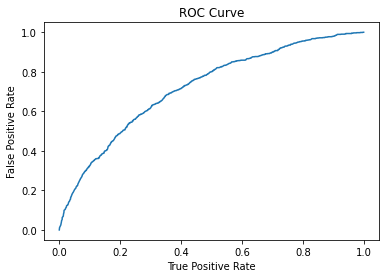

Training set areaUnderROC: 0.7195877585415879


In [0]:
trainingSummary = best_logreg.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))